In [231]:
import pandas as pd
import numpy as np
import plotnine as p9
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [232]:
sold = pd.read_csv('sold.csv', index_col = [0])
sold['price'] = sold['price'].str.replace('M','0000')
sold['price'] = sold['price'].str.replace('.','')
sold['price'] = (sold['price'].str.split()).apply(lambda x: float(x[0].replace('--', '0')))

sold = sold[(sold.T != 0).any()]
del sold['building_type']
sold.head()

,address,zip,price,beds,baths,sqft,agent,brokerage
0,480 Mission Bay Blvd #1008,94158,1910000.0,2,2,1361,Robyn L. Kaufman,COMPASS
1,152 Lombard St APT 403,94111,1120000.0,2,2,1272,Gail Y. Grendahl,COMPASS
2,109 S Lake Merced Hls APT 3C,94132,846000.0,2,2,1247,Joanna A. Rose,REDFIN
3,3620 Cesar Chavez St #404,94110,1270000.0,2,2,1038,Massimo F. Loporto,VANGUARD PROPERTIES
4,65 Joost Ave,94131,1020000.0,--,--,1869,Allison Chapleau,VANGUARD PROPERTIES


In [233]:
sold['price'].describe().astype('int64')

count        800
mean     1408904
std      1168213
min            0
25%       730000
50%      1275000
75%      1842500
max      7600000
Name: price, dtype: int64

# Brokerage Listing Count

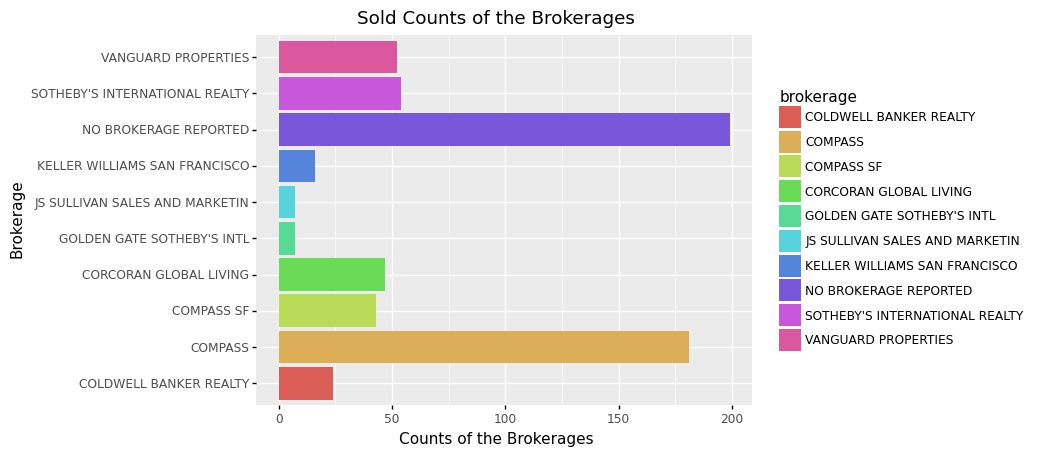

<ggplot: (148654607177)>

In [234]:
fs_bk= sold['brokerage'].value_counts().rename_axis('brokerage').reset_index(name='counts')
fs_bk['brokerage'].replace({'0':'NO BROKERAGE REPORTED'}, inplace=True)
gg = p9.ggplot(fs_bk[:10])
gg += p9.aes(x='brokerage',y = 'counts', fill = 'brokerage')
#gg += p9.geom_histogram() 
gg += p9.geom_bar(stat = 'identity')
gg += p9.coord_flip()
gg += p9.labs(y='Counts of the Brokerages', x='Brokerage', title='Sold Counts of the Brokerages')
gg

In this bar graph, we are only looking at the ten most successful brokerages. Compass is by far the most dominant brokerage in San Francisco. At about 3 times less than the number of Compass listings, Vangaurd Properties and Sotheby's International Realty come in at second and third. 

# Average Listing Price By Brokerage

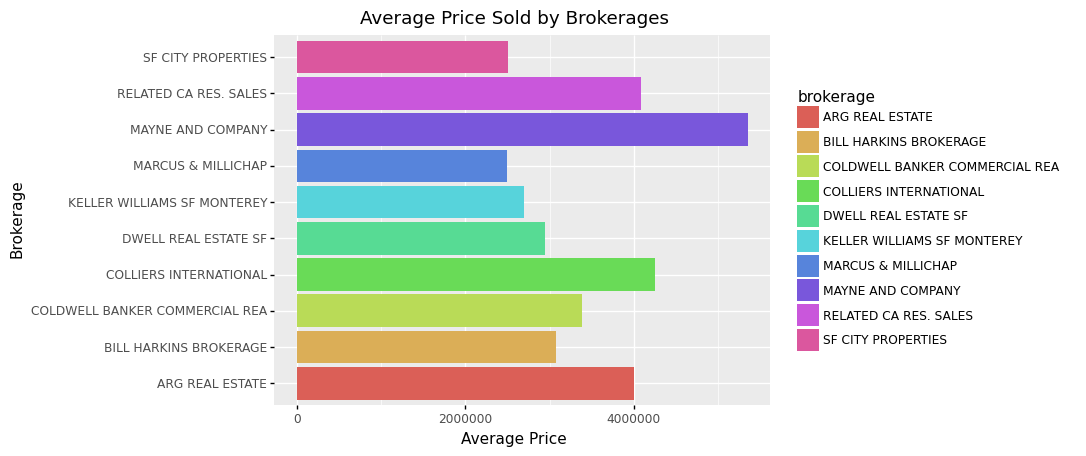

<ggplot: (148653825070)>

In [235]:
brokerage_mean = sold.groupby('brokerage').price.mean().rename_axis('brokerage').reset_index(name='avg price') 
not_brokerage = ['0']
brokerage_mean = brokerage_mean[~brokerage_mean['brokerage'].isin(not_brokerage)]
brokerage_mean = brokerage_mean.sort_values(['avg price'], ascending = False)

#gg = p9.ggplot(brokerage_mean)
gg = p9.ggplot(brokerage_mean[:10])
gg += p9.aes(x='brokerage',y = 'avg price', fill = 'brokerage')
gg += p9.geom_bar(stat = 'identity') 
gg += p9.coord_flip()
gg += p9.labs(y='Average Price', x='Brokerage', title='Average Price Sold by Brokerages')
gg

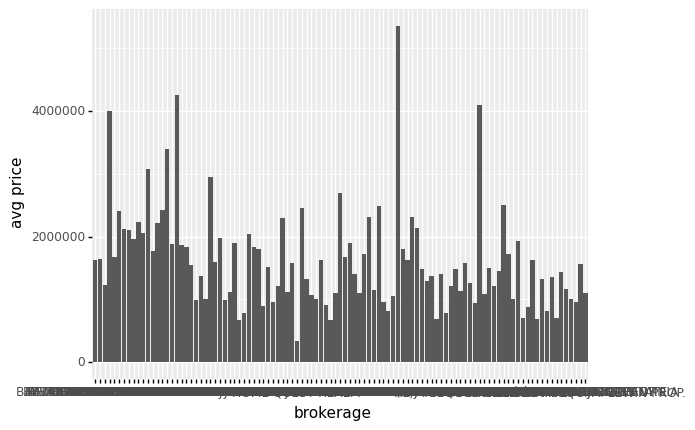

<ggplot: (148660013309)>

In [236]:
gg = p9.ggplot(brokerage_mean)
gg += p9.aes(x='brokerage',y = 'avg price')
gg += p9.geom_bar(stat = 'identity') 
gg

# Agent Listing Count

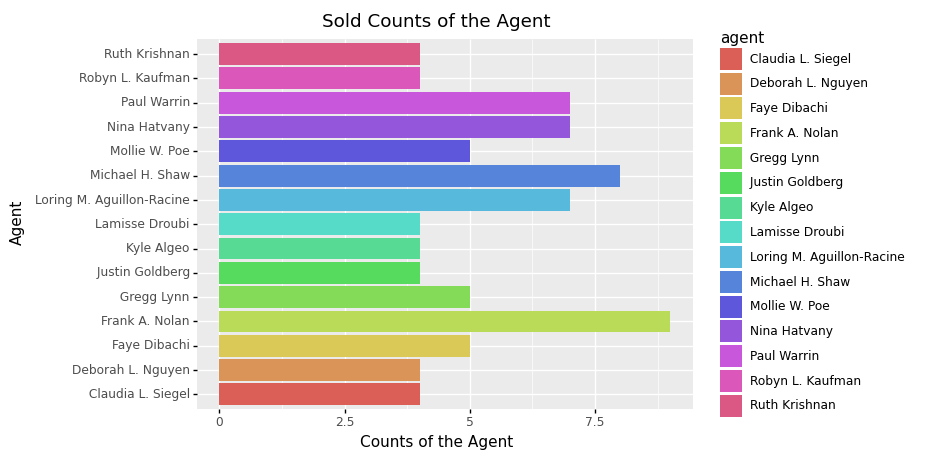

<ggplot: (148655190778)>

In [237]:
fs_ag= sold['agent'].value_counts().rename_axis('agent').reset_index(name='counts')
fs_ag['agent'].replace({'0':'NO AGENT REPORTED'}, inplace=True)
not_agents = ['NO AGENT REPORTED', ' INC.', ' COMPASS', ' INC', ' POLARIS PACIFIC', ' BROKER']
fs_ag= fs_ag[~fs_ag['agent'].isin(not_agents)]
fs_ag
gg = p9.ggplot(fs_ag[:15])
gg += p9.aes(x='agent',y = 'counts', fill = 'agent')
gg += p9.geom_bar(stat = 'identity') 
gg += p9.coord_flip()
gg += p9.labs(y='Counts of the Agent', x='Agent', title='Sold Counts of the Agent')
gg

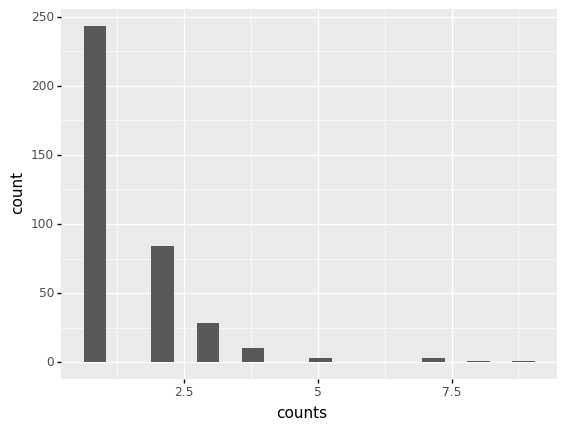

<ggplot: (148654463076)>

In [238]:
gg = p9.ggplot(fs_ag)
gg += p9.aes(x = 'counts')
gg += p9.geom_histogram(bins=20) 
gg

In [211]:
sold.dtypes

address       object
zip            int64
price        float64
beds          object
baths         object
sqft         float64
agent         object
brokerage     object
dtype: object

Text(0.5, 1.0, 'Correlation Between Features')

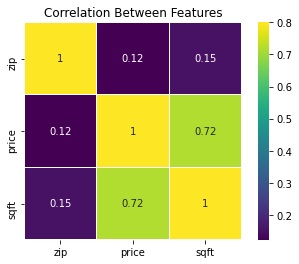

In [239]:
sns.heatmap(heat.corr(), vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation Between Features')

# Linear Regression on Price and Square Feet

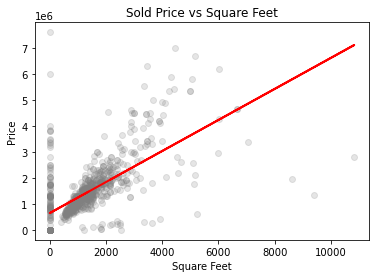

In [240]:
sold['price'] = sold['price'].astype(float)
sold['sqft'] = sold['sqft'].astype(float)

length = len(sold['price'])
x = sold[['sqft']]
y = sold[['price']]
reg = LinearRegression()
reg.fit(x,y)

plt.scatter(x, y,  color='grey', alpha =0.2)
plt.plot(x, reg.predict(x), color='red', linewidth=2)
plt.title('Sold Price vs Square Feet')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.show()

# Price vs Zip

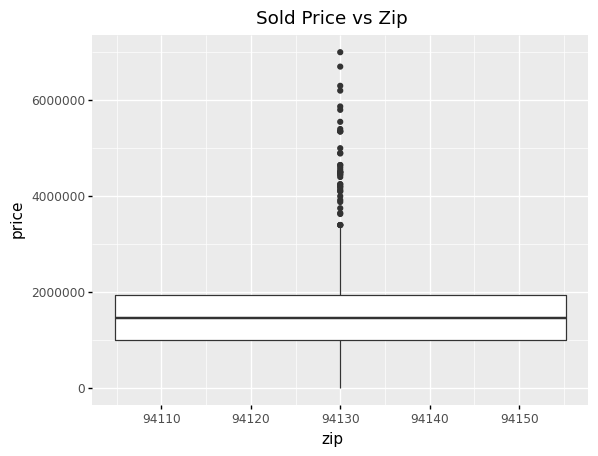

<ggplot: (148653886389)>

In [241]:
(p9.ggplot(data=build_comp,
           mapping=p9.aes(x='zip',
                          y='price', color='zip'))
    + p9.geom_boxplot()
  + p9.labs(title="Sold Price vs Zip")
)

# Price by # of Baths 

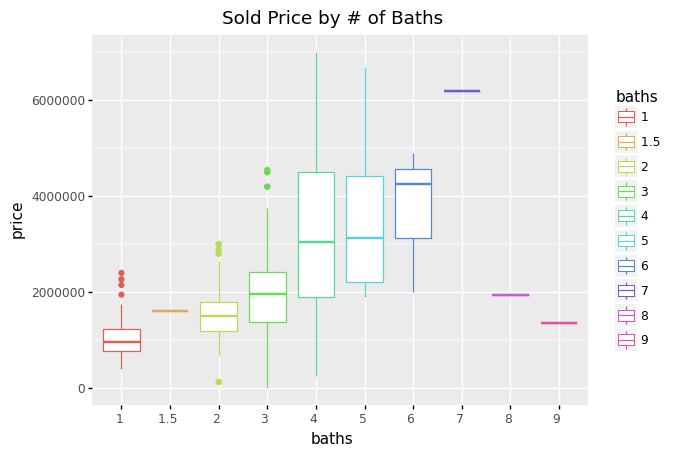

<ggplot: (148654313316)>

In [242]:
(p9.ggplot(data=build_comp,
          mapping=p9.aes(x='baths',
                          y='price', color='baths'))
    + p9.geom_boxplot()
 + p9.labs(title="Sold Price by # of Baths")
)

# Price By # of Beds

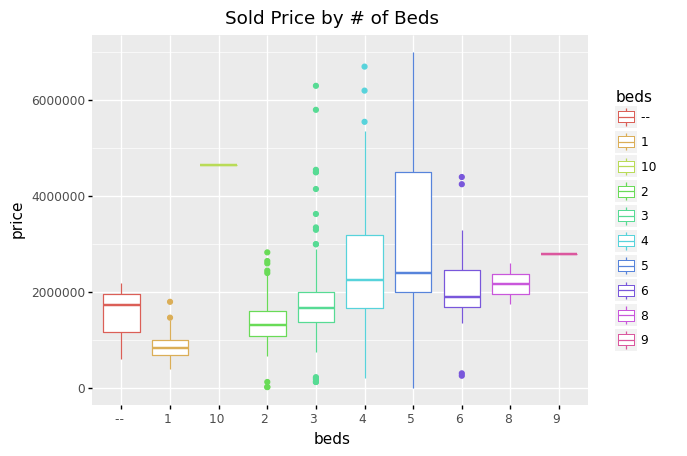

<ggplot: (148652606212)>

In [243]:
build_comp['beds']
(p9.ggplot(data=build_comp,
           mapping=p9.aes(x='beds',
                          y='price', color='beds'))
    + p9.geom_boxplot()
 + p9.labs(title="Sold Price by # of Beds")
)

# Price vs Square Feet By Area Code

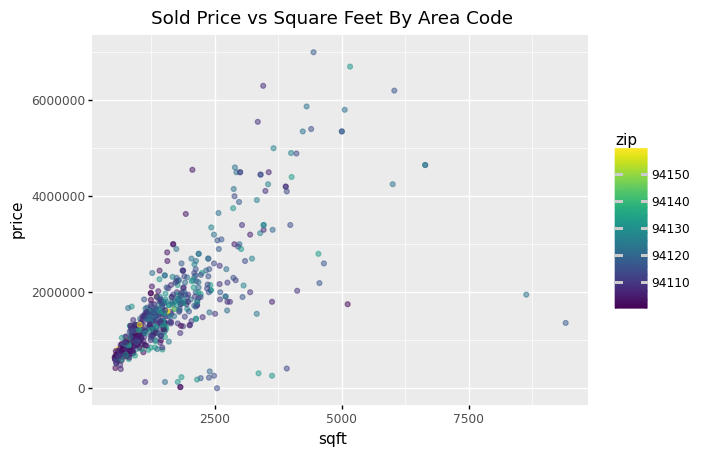

<ggplot: (148659710531)>

In [244]:
(p9.ggplot(data=build_comp,
           mapping=p9.aes(x='sqft',
                          y='price',
                          color='zip'))
    + p9.geom_point(alpha=0.5)
 + p9.labs(title="Sold Price vs Square Feet By Area Code")
)